In [1]:
#CSE 802 Project

import numpy as np
import pandas as pd
from pathlib import Path
import os.path
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import Image, display, Markdown
import matplotlib.cm as cm
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau
from time import perf_counter
import seaborn as sns
from sklearn import svm
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [2]:
trainDF=pd.read_csv("/Users/tarakeswariramachandra/Documents/Michigan State University/CSE 802/archive/sign_mnist_train.csv")
testDF = pd.read_csv('/Users/tarakeswariramachandra/Documents/Michigan State University/CSE 802/archive/sign_mnist_test.csv')

In [3]:
Y_train=trainDF["label"].values
Y_test=testDF["label"].values
trainDF.drop("label",axis=1,inplace=True)
testDF.drop("label",axis=1,inplace=True)

X_train=trainDF.values
X_test=testDF.values



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
hyperParameter = {'C': [0.01, 0.1, 0.5, 1, 10, 100], 
              'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001], 
              'kernel': ['rbf', 'poly', 'linear']} 
IdealPara = GridSearchCV(SVC(), hyperParameter, refit=True, verbose=1, cv=5)
IdealPara.fit(X_train, Y_train)
OptimalPara = grid.best_params_
print(f"Best params: {OptimalPara}")
svm = SVC(**OptimalPara)
svm.fit(X_train, y_train)
print_score(svm, X_train, Y_train, X_test, Y_test, train=True)
print_score(svm, X_train, Y_train, X_test, Y_test, train=False)



Fitting 5 folds for each of 126 candidates, totalling 630 fits


Text(0.5, 1.0, 'Principal Componenet Analysis')

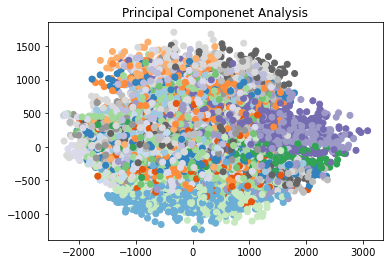

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
X_LDA = LDA(n_components=23).fit_transform(X_train,Y_train)
X_PCA = PCA(n_components=400).fit_transform(X_train)
plt.scatter(X_PCA[:,0], X_PCA[:,1], c=Y_train, cmap='tab20c')
plt.title("Principal Componenet Analysis")
plt.scatter(X_LDA[:,0], X_LDA[:,1], c=Y_train, cmap='tab20c')
plt.title("Linear Discriminate ")

In [ ]:
C = [0.01, 0.1, 0.5, 1, 10]
accuracy=[]
for learn in C:
    model = svm.SVC(kernel='linear', C=learn)
    model.fit(X_train, Y_train)
    YHat = model.predict(X_test)
    acc = accuracy_score(Y_test, YHat)
    accuracy.append(acc)
accuracy


In [ ]:
print("Accuracy in the case of Linear SVM\n:",accuracy)

In [33]:
model = svm.SVC(kernel='rbf', C=0.1)
model.fit(X_train, Y_train)
YHat = model.predict(X_test)
acc = accuracy_score(Y_test, YHat)
acc


0.7732849972113776

In [ ]:
C = [0.01, 0.1, 0.5, 1, 10]
gamma=[0.1, 0.25, 0.5, 0.75]
accuracyPoly=[[0 for _ in range(len(C))] for _ in range(len(C))]

for i in range(len(C)):
    for j in range(len(gamma)):
        model1 = svm.SVC(kernel='poly', C=C[i], gamma=gamma[j])
        model1.fit(X_train, Y_train)
        YHat = model1.predict(X_test)
        accP = accuracy_score(Y_test, YHat)
        accuracyPoly[i][j]=accP




In [ ]:
print("Accuracy in the case of Linear SVM\n:",accuracyPoly)

In [ ]:
#Random forest

from sklearn.ensemble import RandomForestClassifier

component=[200, 250, 300, 350, 400, 450]

est=[100, 200, 300, 400, 500, 600]

randomF=[[0 for _ in range(len(est))] for _ in range(len(est))]


for i in range(len(est)):
    for j in range(len(est)):
        PCAfeatures = PCA(n_components=component[i])
        trainFeatures = PCAfeatures.fit_transform(X_train)

        fit1 = RandomForestClassifier(n_estimators = est[j], n_jobs = 1, 
                                         random_state = 2016, verbose = 1,
                                         class_weight='balanced',oob_score=True)

        fit1.fit(trainFeatures, Y_train)
        testFeatures = PCAfeatures.transform(X_test)
        yHat=fit1.predict(testFeatures)
        randomF[i][j] = accuracy_score(yHat, Y_test) * 100
       



In [49]:

confusionMatrix = confusion_matrix(Y_test, yHat)
print(confusionMatrix)

[[331   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0 379   0  21   0   0   0   0   0  26   0   0   0   0   0   0   4   0
    0   0   0   2   0   0]
 [  0   0 300   0   0   0   0   0   0   0   9   0   0   1   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0 244   0   0   0   0   0   0   0   0   0   0   0   0   1   0
    0   0   0   0   0   0]
 [  0   0   0   0 463   0   0   0   0   0   0   0   0   0   0   0   0  35
    0   0   0   0   0   0]
 [  0   0   5   0   0 226   0   1   0   0  13   0   0   2   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0 292  17   0   0   0   0   0   0   0   0   0   0
   39   0   0   0   0   0]
 [  0   0   0   0   0   0  30 391   0   0   0   0   0   0   0   8   0   0
    7   0   0   0   0   0]
 [  5  21   0   0  11   6   0   2 148   0   0  10  19   0   0   6   0  18
    3   0   0   1   0  38]
 [  0   0   0   0   0   1   0   0  11 223   3   3   0   0   3   0  47   9
    0  12   0  19

In [ ]:
test_features = pca.transform(X_test)
yHat=rfr.predict(test_features)
precision = accuracy_score(yHat, Y_test)
precision



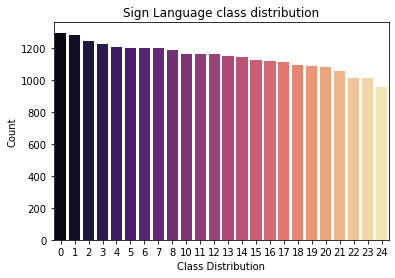

In [34]:
#Reading training data
#Using Seaborn package for plotting

trainDF=pd.read_csv("/Users/tarakeswariramachandra/Documents/Michigan State University/CSE 802/archive/sign_mnist_train.csv")
testDF = pd.read_csv('/Users/tarakeswariramachandra/Documents/Michigan State University/CSE 802/archive/sign_mnist_test.csv')
trainDF.head(5)
nrow=trainDF.shape[0]
ncol=trainDF.shape[1]

#Plotting the distribution of classes

LabelCount=trainDF['label'].value_counts()
X=pd.DataFrame(LabelCount.index)
Y=pd.DataFrame(LabelCount[::])
ax=sns.barplot(x=sorted(LabelCount.index), y=LabelCount, palette='magma')
ax.set(xlabel='Class Distribution', ylabel='Count')
plt.title("Sign Language class distribution")
plt.show()



